In [3]:
from IPython.display import HTML,IFrame
import numpy as np
import matplotlib.pyplot as plt
import math as m

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this Jupyter notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
''')


![title](Fig/TITLE.png)

### <h1><center>Module 9: Digital Sampling and Reconstruction of Analog Signals</center></h1>

This section investigates the procedure for digital sampling of analog signals.  We also investigate how to go the other way: reconstructing an analog signal from a discrete-time sequence.  We also look to understand the conditions when a sampled signals can uniquely represent its analog counterpart.  That is how to avoid [aliasing](https://en.wikipedia.org/wiki/Aliasing). Let's look at an example of aliasing:

In [4]:
IFrame('https://www.youtube.com/embed/ByTsISFXUoY', width=700, height=350)

As discussed in previous sections, all of the numerical examples presented so far have relied on series of data points that have "sampled" either from some sort of analytic function [e.g., $x(t)=A\mathrm{sin}\left(\omega t+\phi\right)$] or from a data set made from a measureable analog signal (e.g., earthquake WAV file) that has been digitized and made available through the internet.  

However, questions we have not asked yet include: 

* Is the process of how we and/or others sampled the continuous analog signal valid?
* What are the conditions in which the sampling is "valid"?
* How can we reconstruct the analog signal from the sampled version?

# Refresher on Sampling

<a href="https://en.wikipedia.org/wiki/Sampling_(signal_processing)">Sampling</a> is the process of converting a **continuous-time signal** $x(t)$ into a **discrete-time sequence** $x[n]$.  In this case, the sequence $x[n]$ is obtained by extracting $x(t)$ every $T$ seconds where $T$ is called the **sampling period** or **sampling interval**.  That is, $x[n]=x(nT)$.

One may express the relationship between $x(t)$ and $x[n]$ as:


$$ x[n] = x(nT) = \left. x(t)\right|_{t=nT} \quad \mathrm{where} \quad n=...,-1,0,1,2,... \tag{1}$$


Conceptually, the conversion of $x(t)$ to $x[n]$ is achieved by a continuous- to discrete-time (CD) conversion operation, which is illustrated in Figure 1.

<img src="Fig/4.1 CD_conversion.png" width="500">

**Figure 1. Block diagram of a continuous- to discrete-time (CD) convertor. The input continuous signal $x(t)$ is input into the CD where it is multiplied by the impulse train $i(t)$ (also call Dirac comb or Shah function) to form the sampled - but still continuous -  signal $x_s(t)$.  This signal is then processed through the ''impulse train to sequence converter'' to generate the output discrete sequence $x[n]$.**

# Reconstructing signals?

While this all looks fine and good, we must ask two key follow-up questions:
1. Does $x[n]$ uniquely represent $x(t)$? Take a look at Figure 2 to obtain some insight into this question.
2.  If so, can we use $x[n]$ to reconstruct $x(t)$? Again, look at Figure 2 and ask the question: "How can we invert the process illustrated in this figure?"

<img src="Fig/4.1 Reconstructed Signals.png" width="400">

**Figure 2. Three different reconstructed signals that all honor the values at sampled locations.**

<div class="alert alert-info" role="alert">
The answer to these two questions is yes, provided the following conditions hold:

1. $x(t)$ is [bandlimited](https://en.wikipedia.org/wiki/Bandlimiting) such that its Fourier Transform $\widehat{X}(\omega)=0$ for $|\omega|\ge \omega_b$, where $\omega_b$ is the <a href="https://en.wikipedia.org/wiki/Bandwidth_(signal_processing)">bandwidth</a> of the signal; and

2. The sampling period $T$ is sufficiently small.
</div>
We will discuss just what these two conditions including "sufficiency" mean below.

# Example 1 - Sampling and the limits of aliasing

**Q:** A 100 Hz $\cos$ continuous-time input signal, $x(t)=\mathrm{cos}\,(100 \times 2\pi t)$ (see top panel in figure below), is used as the input for a CD converter with sampling periods of $T_1=1/1000$ s and $T_2=1/100$ s. Determine the resultant discrete-time signal $x[n]$.

**A:** According to equation 1, $x[n] = x(nT)$, the digitized discrete sequence $x[n]$ would be given by:

$$ {\bf CASE\,1}:\quad x[n]=x(nT_1) = \mathrm{cos}\,(100 \times 2\pi nT_1) = \mathrm{cos}\left(\frac{2\pi \times n}{10}\right), \quad n=...,-1,0,1,2,... \tag{2}$$

Thus, the frequency in $x(t)$ is 100 Hz while that of $x[n]$ appears to be $1/10$.  This means that the resulting signal should have a periodicity of 10 samples.  This is illustrated in the middle panel below.

Let's do the experiment with a different sampling rate of $T_2=100$ Hz. In this case:

$$ {\bf CASE\,2}:\quad x[n]=x(nT_2) = \mathrm{cos}\,(100 \times 2\pi nT_2) = \mathrm{cos}\left(2\pi \times n\right), \quad n=...,-1,0,1,2,...\tag{3}$$

Thus, the frequency in $x(t)$ is 100 Hz while that of $x[n]$ apppears to be $1$, which means that the signal has a periodicity of one!  Note that the **aliased** signal is equivalent to a Shah function of evenly sampled unit impulses. The aliased signal is shown in the bottom panel below.  For the lower two panels, ask yourself the question: **"What is the lowest frequency sinusoid that will fit these samples?"**

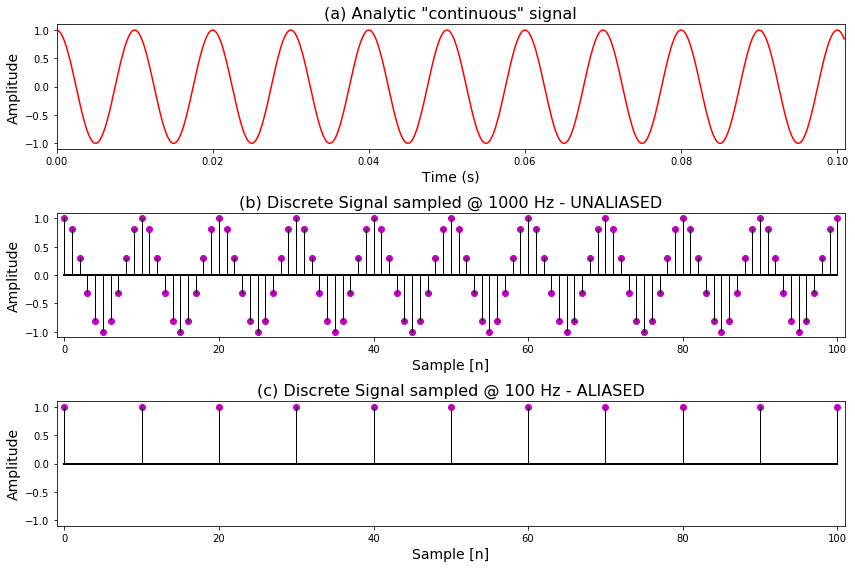

In [3]:
# . . Set the range and sampling of your n axis
# . . Try uncommenting the other two to see if they are aliased
#nmin,nmax,sfreq=0.,0.2,1./(300.)
unalias=1000.
alias = 100
nmin ,nmax ,sfreq=0.,0.101,1./unalias
nmin2,nmax2,sfreq2=0.,0.101,1./alias

# . . Now set your unaliased sampling rate
tfreq = sfreq/10.

# . . Make a linear array starting at tmin going to tmax with nt points
nn = np.arange(nmin,nmax,sfreq)
nn2= np.arange(nmin2,nmax2,sfreq2)
tt = np.arange(nmin,nmax,tfreq)

# . . Make a sufficientaly sampled "analytic function"
continuoussignal = np.cos(100*2*np.pi*tt)

# . . Make the discrete sampled signals
discetesignal = np.cos(100*2*np.pi*nn) 

# . . Make the discrete sampled signals
discetesignal2 = np.cos(100*2*np.pi*nn2) 

# . . Make output plots
plt.figure(figsize=(12, 8))

plt.subplot(311)
plt.plot(tt,continuoussignal,'r')
plt.axis([nmin,nmax,-1.1,1.1])
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(a) Analytic "continuous" signal',fontsize=16)

plt.subplot(312)
markerline, stemlines, baseline = plt.stem(nn/sfreq, discetesignal,'-.')
plt.setp(baseline, 'color', 'k', 'linewidth', 2)
plt.setp(stemlines, 'color', 'k', 'linewidth', 1,'linestyle','-')
plt.setp(markerline, 'color', 'm')
plt.axis([nmin,nmax/sfreq,-1.1,1.1])
plt.xlabel('Sample [n]',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(b) Discrete Signal sampled @ 1000 Hz - UNALIASED',fontsize=16)
plt.xlim(-1,101)

plt.subplot(313)
markerline, stemlines, baseline = plt.stem(nn2/sfreq, discetesignal2,'-.')
plt.setp(baseline, 'color', 'k', 'linewidth', 2)
plt.setp(stemlines, 'color', 'k', 'linewidth', 1,'linestyle','-')
plt.setp(markerline, 'color', 'm')
plt.axis([nmin,nmax/sfreq,-1.1,1.1])
plt.xlabel('Sample [n]',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(c) Discrete Signal sampled @ 100 Hz - ALIASED',fontsize=16)
plt.xlim(-1,101)

plt.tight_layout();plt.show()

**Figure 3. (a) The continuous waveform data representing a 100 Hz cosine signal. (b) A discrete verision of the signal in (a) formed by sampling it using a 1000 Hz sampling rate, which means obtaining a value at a rate of 10 samples per cycle.  Evidently, this appears to be sufficient for recovering the above signal. (c) The continuous waveform data sampled at 100 Hz, or one sample per cycle. If you were to estimate a curve to fit this, you would likely draw a flat waveform than the true signal because you don't have any other information to go on. This is an example of aliasing.**

# Sampled Signals in the Frequency Domain

Let's now look more closely at the mathematics of what is happening behind the scenes in Figure 1.  In the time domain the sampled continuous-time signal $x_s(t)$ is obtained by multiplying $x(t)$ by the impulse train (i.e., Dirac comb or Shah function) $i(t)$:

$$i(t) = \sum_{k=-\infty}^{\infty} \delta(t-kT), \tag{4} $$

which gives the following representation of the continuous-time sampled signal $x_s(t)$:

$$ x_s(t) = x(t) i(t) = x(t) \sum_{k=-\infty}^{\infty} \delta(t-kT) = \sum_{k=-\infty}^{\infty}x(kT) \delta(t-kT)= \sum_{k=-\infty}^{\infty}x[k] \delta(t-kT), \tag{5}$$

with use of the $\delta$-function sifting property.  Let the **sampling rate** (i.e., in terms of angular frequency in radians) be $\omega_s =2\pi f_s = \frac{2\pi}{T}$.  From a previous example we know that the Fourier transform of an infinite series of impulses (i.e., the Shah Function) is given by a weighted infinite series of impulses:

$$ \mathcal{F}(i(t)) = \widehat{I}(\omega) = \omega_s \sum_{k=-\infty}^{\infty} \delta(\omega-k\omega_s). \tag{6} $$

By the convolution theorem, we know that the multiplication of two signals in the time domain is equivalent to the convolution of these two signals in the Fourier domain. Thus, we write:

$$ x_1(t) \, x_2(t) \Longleftrightarrow \frac{1}{2\pi} \widehat{X_1}(\omega) \ast \widehat{X_2}(\omega) = \frac{1}{2\pi} \int_{-\infty}^{\infty} \widehat{X_1}(\omega^\prime) \,\widehat{X_2}(\omega-\omega^\prime)\,\mathrm{d}\omega^\prime, \tag{7} $$

where the convolution operation corresponds to continuous-time signals, and $\omega^\prime$ is the dummy variable associated with the convolution integral (that has the same dimensions as frequency).  

Using the above properties of $\delta(t)$, $\widehat{X_s}(\omega)$ is given by:

$$
\begin{eqnarray}
\widehat{X_s}(\omega) & = & \frac{1}{2\pi}\int_{-\infty}^{\infty} \widehat{I}(\omega^\prime) \, \widehat{X}(\omega-\omega^\prime)  \,\mathrm{d}\omega^\prime  \tag{8a}\\
\, &=& \frac{1}{2\pi}\int_{-\infty}^{\infty} \left( \omega_s \sum_{k=-\infty}^{\infty} \delta (\omega^\prime-k\omega_s)\right) \, \widehat{X}(\omega-\omega^\prime)  \,\mathrm{d}\omega^\prime  \tag{8b}\\
\, &=& \frac{1}{T}\sum_{k=-\infty}^{\infty}\left(\int_{-\infty}^{\infty} \widehat{X}(\omega-\omega^\prime) \delta (\omega^\prime-k\omega_s)\,\mathrm{d}\omega^\prime \right) \tag{8c}\\
\, &=& \frac{1}{T}\sum_{k=-\infty}^{\infty} \widehat{X}(\omega-k\omega_s),  \tag{8d}\\
\end{eqnarray}
$$

which is the sum of infinite number of shifted copies of $\widehat{X}(\omega)$ scaled by $\frac{1}{T}$.  

Equation 8b is found by inserting the Fourier Transform of the impulse train from equation 6.  Equation 8c is found by rearranging terms (i.e., exchanging the order of the summation and integration).  Equation 8d is just the result of evaluating the integral of function $\widehat{X}(\omega-\omega\prime)$ multiplied by delta function $\delta(\omega^\prime-\omega_0)$, which returns the function with non-zero values only where the argument of the delta function is zero (i.e., where $\omega^\prime=\omega_0$ so that $\widehat{X}(\omega-\omega_0)$). Given the **bandwidth** of the signal, $-\omega_b<\omega<\omega_b$, when the (angular) sampling rate $\omega_s$ is chosen *sufficiently large* such that all copies of $\widehat{X}(\omega)/T$ do not overlap (i.e., $\omega_s-\omega_b \gt \omega_b$ or $\omega_s \gt 2\omega_b$), the signal is **unaliased** we can recover $\widehat{X}(\omega)$ from $\widehat{X_s}(\omega)$.

## Aliasing - Graphically

Let's look at Figures 4 and 5 to get a more intuitive understanding of the effects of the sampling in the frequency domain.  Figure 4 shows an example where the sampling frequency is sufficiently large such that a signal will be **unaliased**.

<img src="Fig/4.1 Nonaliased3.png" width="700">

**Figure 4. (Upper left) Frequency-domain triangle function (i.e., Fourier transform of the $\mathrm{sinc}^2(\pi t)$  function) with bandlimit $\omega_b$. (Lower Left) Frequency-domain representation of the impulse train with a period of $\omega_s$.  (Right) Frequency-domain representation of the sampled signal. Note that the individual contributions to the infinitely repeating pattern do not overlap, which is a key requirement for non-aliased discrete signals.**

However, when $\omega_s$ is *not* chosen to be sufficiently *large* such that $\omega_s\lt 2\omega_b$, copies of $\overline{X(\omega)}/T$ overlap, we cannot recover $\overline{X(\omega)}$ from $\overline{X_s(\omega)}$, and the resulting signals are **aliased**.  This is the case illustrated in Figure 5.

<img src="Fig/4.1 Aliased.png" width="700">

**Figure 5. (Upper left) Frequency-domain triangle function (i.e., Fourier transform of the $\mathrm{sinc}^2(\pi t)$ function) with bandlimit $\omega_b$. (Lower left) Frequency-domain representation of the impulse train with a period of $\Omega_s$.  Note that the corresponding frequency-domain impulses are more closely spaced than its counterpart in Figure 3.  (Right) Frequency-domain representation of the sampled signal, which is found by the convolution of the two signals to the left.  Note that the individual contributions to the infinitely repeated pattern overlap, indicating that the resultant signal will be aliased.**

Hopefully, now you have a more intuitive appreciation of what happens in the frequency domain when signals are aliased.  Now let's move on to one of the key theorems in digitial signal processing: The Nyquist-Shannon sampling theorem.

# Nyquist-Shannon Sampling Theorem

The pioneering work in digital sampling was published in 1928 by [Harry Nyquist](https://en.wikipedia.org/wiki/Harry_Nyquist), and then later extended by [Claude Shannon](https://en.wikipedia.org/wiki/Claude_Shannon) to what is now referred to as the [Nyquist-Shannon Sampling Theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem).  Note that this is normally stated using frequency instead of angular frequency, so we will do the same.  Of course, the frequency and angular frequency variables are related to each other by a factor of $2\pi$ (i.e., $\omega_b = 2\pi f_b$).

<div class="alert alert-info" role="alert">
If $x(t)$ is a continuous-time signal with a bandlimit given by $f_b$:

$$\widehat{X}(f)=0,\quad |f|\ge f_b, \tag{9} $$

then $x(t)$ is uniquely determined by its discrete samples at uniform sampling $T$

$$x[n]=x(nT), n=...,-1,0,1,2,...\tag{10}$$

provided the following holds true:

$$f_s =\frac{1}{T} \gt 2f_b. \tag{11} $$

The bandwidth $f_b$ is also known as the [Nyquist Frequency](https://en.wikipedia.org/wiki/Nyquist_frequency), while $f_s=2f_b$ is called the [Nyquist Sampling Rate](https://en.wikipedia.org/wiki/Nyquist_rate), which $f_s$ must **exceed** (i.e., be greater than) in order to avoid aliasing.  
</div>

Note that one can also have the **angular Nyquist frequency**, $\omega_b=2\pi f_b$, and the **angular Nyquist Sampling Rate**, $\omega_s=2\pi f_s$. 

## Example 2 - Nyquist Frequency and Sampling Rate

**Q:** Determine the Nyquist frequency and Nyquist rate for the continuous-time signal $x(t)$ defined in the following way:

$$x(t) = 1+\mathrm{sin}\,(1000\cdot2\pi t)+\mathrm{sin}\,(2000\cdot 2\pi t) \tag{12} $$

**A:** The three frequencies contributing to signal $x(t)$ are $[0,1000,2000]$ Hz.  Thus, the Nyquist frequency $f_b=2000$ Hz while the Nyquist sampling rate is $f_s=4000$ Hz.

# Toward Reconstruction (in the Frequency Domain)

Note that even if $\widehat{X}(\omega)$ is unaliased at this point, we still would not want to take an inverse Fourier transform of this sampled function.  This is because to recover the original signal we must remove all of the other infinitely repeating replicas of the original signal.   In the frequency domain we can multiply $\widehat{X_s}(\omega)$ by a boxcar function $\widehat{\Pi}(\omega)$ with an amplitude $T$ and a cut-off frequency $\omega_c$, where $\omega_b \lt \omega_c \lt \omega_s-\omega_b$ to obtain the reconstructed signal $\widehat{X_r}(\omega)$.  

<img src="Fig/4.1 Final-filter.png" width="700">

**Figure 6. (Upper left) Signal $\widehat{X_s}(\omega)$ in the Fourier domain with the infinite number of replicas.  (Lower left) Fourier-domain box-car function that is multiplied with the signal in upper left.  (Right) After multiplying the two frequency spectra on the left, one recovers the spectrum of the original input signal (upper left of Figure 4).**

Note that  the convolution theorem states that in the time domain this operation corresponds to $x_r(t)=\mathrm{sinc}(\pi t) \ast x_s(t)$.  Thus, you should expect that the **sinc** function will play an important part in both sampling and performing [**sinc interpolation**](https://en.wikipedia.org/wiki/Whittaker%E2%80%93Shannon_interpolation_formula) to reconstruct an undistorted time series sampled at a higher frequency rate.


## Time-domain Reconstruction

Reconstruction is the process of transforming the sequence $x[n]$ back to continuous-time function $x(t)$.  A good way to describe this is shown in Figure 7, which is a block diagram of a digital-to-continuous (DC) converter (that is effectively the inverse of the CD converter shown in Figure 1):

<img src="Fig/4.1 DC converter.png" width="300">

**Figure 7. Block diagram of a DC converter that takes a discrete sequence and forms a continuous analog output.**

Let's now use the fact that we can convolve the sampled signal $x_s(t)$ with a $h(t)=sinc(t)$ function to reconstruct the continuous reconstructed result, $x_r(t)$.  Let's start by defining the box-car function $\widehat{H}(\omega) = \widehat{\Pi}(\omega)$ discussed above:

$$\widehat{H}(\omega) =\widehat{\Pi}(\omega) = \left\{\begin{array}{ll}T, &\quad -\omega_c \lt \omega \lt \omega_c\\ 
0, & \quad \mathrm{otherwise}\end{array}\right. \tag{13}$$

where $\omega_b \lt \omega_c \lt \omega_s-\omega_b$.  Let's set our cut-off frequency $\omega_c$ as the following:

$$\omega_c = \frac{\omega_s}{2} = \frac{\pi}{T}. \tag{14}$$

To use the box-car function in the time domain (i.e., a $sinc (t)$ function), we take the inverse Fourier transform of $\widehat{\Pi}(\omega)$ and use a previous example to write:

$$
h(t) =
\mathcal{F}^{-1}(\widehat{\Pi}(\omega))
= \frac{1}{2\pi}\int_{-\infty}^{\infty} \widehat{\Pi}(\omega) \mathrm{e}^{i\omega t}\mathrm{d}\omega 
= \frac{1}{2\pi} \int_{-\pi/T}^{\pi/T} T \mathrm{e}^{i\omega t}\mathrm{d}\omega 
= \frac{T \mathrm{sin} \left(\pi t/T\right)}{\pi t}
= \mathrm{sinc}\left(\frac{t}{T}\right) \tag{15} $$

Thus, we may write the following formula to generate the reconstructed continuous output, $x_r(t)$, according to:

$$\begin{eqnarray}
x_r(t) &=& x_s(t)\otimes h(t)  \tag{16a}\\
\,     &=& \left(\sum_{k=-\infty}^{\infty} x(kT) \delta(t-kT) \right) \otimes h(t) \tag{16b}\\
\,     &=& \int_{-\infty}^{\infty} \sum_{k=-\infty}^{\infty} x(kT) \delta(\tau-kT) h(t-\tau) \mathrm{d}\tau \tag{16c}\\
\,     &=& \sum_{k=-\infty}^{\infty} x(kT) \left(\int_{-\infty}^{\infty} \delta(\tau-kT) h(t-\tau) \mathrm{d}\tau\right) \tag{16d}\\
\,     &=& \sum_{k=-\infty}^{\infty} x(kT) \, h(t-kT) \tag{16e} \\
\,     &=& \sum_{k=-\infty}^{\infty} x(kT) \, \mathrm{sinc}\left(\frac{t-kT}{T}\right) =
\sum_{k=-\infty}^{\infty} x[k] \, \mathrm{sinc}\left(\frac{t-kT}{T}\right)
. \tag{16f}
\end{eqnarray}
$$

We got to equation 16b by inserting the expression for sampled signal $x_s(t)$ from equation 5 into equation 16a. Equation 16c comes from using the integral expression from the convolution theorem.  Equation 16d is just rearranging the expression.  Equation 16e comes from using the properties of the $\delta$ function, namely that the only non-zero values of $\tau$ in the integral is when $\tau = kT$. The final step to equation 16f is when we actually substitute the $sinc(t)$ function for $h(t)$ and recognizing that we may exchange $x(kT)=x[k]$.  This represents the **sinc-interpolation** formula for reconstructing signals.

The interpolation formula can be verified at $t=nT$ to exactly reconstruct the sample amplitudes:

$$ x_r(nT) = \sum_{k=-\infty}^{\infty} x[k]\,\mathrm{sinc}\left(n-k\right) \tag{17} $$

It is straightforward to see that when $n$ and $k$ are integers, one gets:

$$ \mathrm{sinc} \left(n-k\right) = \frac{\mathrm{sin}((n-k)\pi)}{(n-k)\pi} = 
\left\{ 
\begin{array}{c} 
0 ,\quad n\neq k \\
1, \quad n=k \\
\end{array}
\right.
\tag{18a} 
$$

or 

$$ \mathrm{sinc} \left(n-k\right) = \delta[n-k] \tag{18b}$$

For $n=k$ one can again use L'Hopital's rule to establish that ${\rm sinc}(0)=1$.  Substituting equation 18b into 17, one finds that:

$$
\begin{eqnarray}
x_r(nT) &= &\sum_{k=-\infty}^{\infty} x[k]\,\mathrm{sinc}\left(n-k\right)  \tag{19a}\\
&=& \sum_{k=-\infty}^{\infty} x[k]\delta[n-k] \tag{19b}\\
&=& x[n] = x(nT), \quad n\in I \tag{19c}
\end{eqnarray}
$$

and thus the signal is exactly reconstructed at all sampled points [i.e., $x_r(t)=x(t)$] according to equation 1 above.

## Example 3 - Time Shifting

**Q:**  Given a discrete-time sequence $x[n]=x(nT)$.  Generate its time-shifted version $y[n]$ having the form:

$$ y[n] = x(nT-\Delta) \tag{20} $$

where $\Delta$ represents a time lag.

**A:** Applying the result of equation 16f with $t=nT-\Delta$ results in:

$$ 
\begin{eqnarray}
y[n]= x(nT-\Delta) &=& \sum_{k=-\infty}^{\infty} x[k] \, \mathrm{sinc}\left(\frac{t-kT}{T}\right) \tag{20a} \\
&=& \sum_{k=-\infty}^{\infty} x[k]\, \mathrm{sinc} \left( \frac{nT-\Delta-kT}{T} \right)  \tag{20b} 
\end{eqnarray}
$$

Using a change of variable $l=n-k$ generates the final result:

$$ y[n] = \sum_{l=-\infty}^{\infty} x[n-l]\,\mathrm{sinc}\left(\frac{lT-\Delta}{T} \right) \tag{21a} $$

Note that when $\Delta$ is exactly an integer multiple of the sampling period (i.e., $\Delta=mT$) the time-shifted signal is simply obtained by shifting the sequence $x[n]$ by $m$ samples:

$$ 
\begin{eqnarray}
y[n] &=& \sum_{l=-\infty}^{\infty} x[n-l]\,\mathrm{sinc}\left(\frac{lT-mT}{T} \right) \tag{21b} \\
     &=& \sum_{l=-\infty}^{\infty} x[n-l]\,\mathrm{sinc}\left(l-m \right) \tag{21c}\\
     &=& \sum_{l=-\infty}^{\infty} x[n-l]\delta[l-m] \tag{21d}\\
     &=&  x[n-m]\ \tag{21e}\\
\end{eqnarray} $$

where the last step is just using the definition of the (discrete) delta function.

## Sampling and Reconstruction in DSP

Sampling and reconstruction in digital signal processing is based on a number of steps.  
   1. CD converter produces a sequence $x[n]$ from $x(t)$.
   2. $x[n]$ is processed in discrete time domain to give $y[n]$.
   3. DC converter reconstructs $y_r(t)$ from $y[n]$ according to equation 16:

$$ y_r(t) = \sum_{n=-\infty}^{\infty} y[n]\, \mathrm{sinc}\left(\frac{t-nT}{T}\right) \tag{22} $$

<img src="Fig/4.1 Samp and Reconstruction.png" width="600">

**Figure 8.  Idealized digital processing flow for an analog signal.**

However, $x(t)$ may not be precisely bandlmited, and a **lowpass filter** (or anti-aliasing filter) must be applied within the chain (see Figure 9).  Thus, the ideal CD converter is approximated by an AD converter (because it is not practical to generate $\delta(t)$, and the AD converter introduces quantization error).  The ideal CD converter is *approximated* by a DA converter because the ideal reconstruction in equation 16 is impossible.  This is because it is:
   * Not practical to perform infinite summation; and
   * Not practical to have future data!
    
<img src="Fig/4.1 AD converter.png" width="600">
    
**Figure 9. The practical digital processing flow for an analog signal that includes an initial filtering step prior to discretization.** 

## Example 4 - Analog-Digital (AD) conversion

**Q:** Suppose a continuous-time signal $x(t)=\mathrm{cos} \left(2\pi f t\right)$ is sampled at a sampling frequency of $f_s=1000$ Hz to produce $x[n]$:

$$ x[n] = \mathrm{cos} \left[\frac{2\pi n}{8}\right] \tag{23} $$

Determine two possible positive values of $f$ (say $f_1$ and $f_2$).  Discuss whether $\mathrm{cos}\left(2\pi f_1 t\right)$ or $\mathrm{cos}\left(2\pi f_2 t\right)$ will be obtained when passing through the DC converter.

**A:** With a given sampling interval of $T=1/1000$ s, we can ask the question "what ratio of candidate signal frequency, $f_1$, to sampling rate frequency, $f_s$, will give us the same result?"

$$  \mathrm{cos} \left[\frac{2\pi n}{8}\right]  = \mathrm{cos} \left[\frac{2\pi f_1 n}{f_s} \right] = \mathrm{cos} \left[\frac{2\pi f_1n}{1000} \right].  \tag{24} $$

Looking at the arguments of these function, $f_1$ may be computed as:

$$ \frac{2\pi n}{8} = \frac{2\pi f_1 n}{1000} \rightarrow f_1 = \frac{1000 \pi}{4\cdot 2\pi} = 125 Hz \tag{25} $$

Thus, one of the frequencies coming passing through the DC converter is $f_1$=125 Hz. We can recover $\mathrm{cos}\left(2\pi f_1 t\right)$ because the sampling rate (1000Hz) is higher than the Nyquist sampling rate $250$ Hz.  

To obtain $f_2$ we can use the periodicity of a sinusoid to define the following:

$$  \mathrm{cos} \left[\frac{2\pi n}{8}\right] = \mathrm{cos} \left[\frac{2\pi n}{8}+2n\pi\right] = \mathrm{cos} \left[\frac{9\pi n}{4}\right] = \mathrm{cos} \left[\frac{2\pi f_2 n}{1000}\right].  \tag{26} $$

As a result we have 

$$ \frac{9\pi n}{4}=\frac{2\pi f_2 n}{1000} \rightarrow \frac{9000\pi}{4\cdot 2\pi} = 1125 Hz  \tag{27} $$

Because we have a Nyquist frequency of $f_2=1125$ Hz a Nyquist sampling rate of $f_s>2250$ Hz, we are not able to pass this signal through the DC converter. 

## Approximate Reconstruction?

One interesting question is "how well can we reconstruct the above signal using a fixed number of samples N?" Based on equation 17 above, we can reconstruct signal $x_r(t)$ from the N-point $x[n]$ by applying:

$$x_r(t) = \sum_{k=-\infty}^{\infty} x[k] \, \mathrm{sinc}\left(\frac{t-kT}{T}\right) \approx \sum_{k=-N/2}^{3N/2} x[k]\,  \mathrm{sinc} \, \left(\frac{t-kT}{T}\right)  \tag{28}
$$

where $T=1/1000$ s.  Note that I have replaced the infinite sum on the middle term for a definite number on the right.  This is a ''rule of thumb'' that you give an additional $N/2$ points on either end to allow for smooth interpolation.

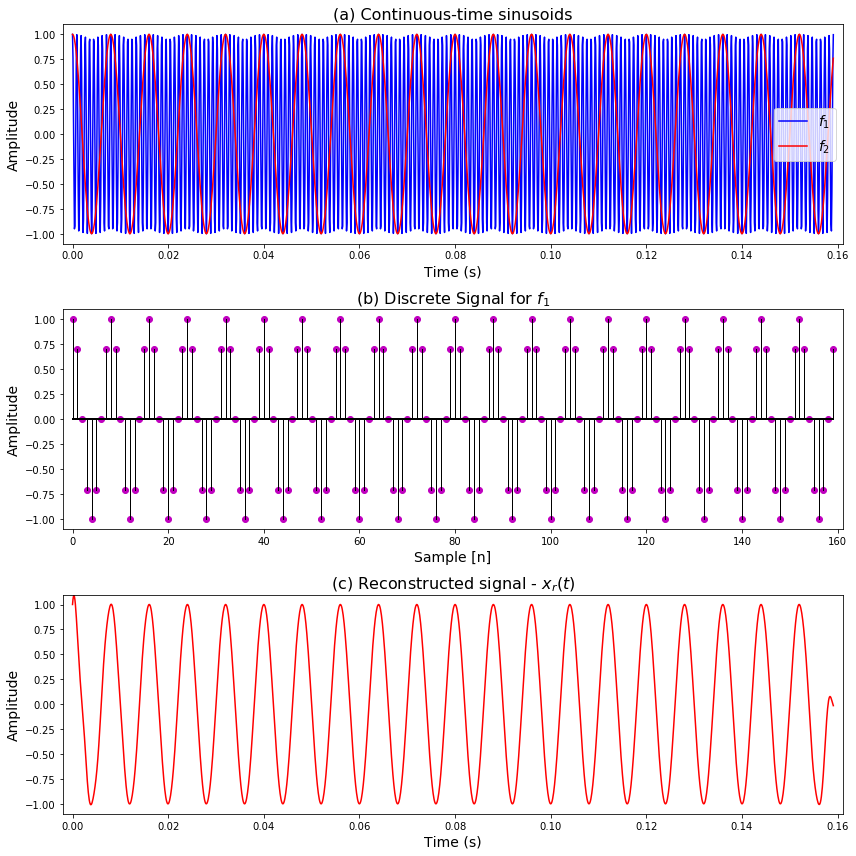

In [4]:
# . . Close all plot windows
plt.close('all')
plt.figure(figsize=(12, 12))

# . . Set the range and sampling of your n axis
nmin,nmax,sfreq=0.0,125/(250*np.pi),1000.

# . . Derive period from sampling rate
T=1./sfreq

# . . Now set an unaliased sampling rate (a large number, say 10x)
tfreq = sfreq*10.

# . . Make a linear array starting at tmin going to tmax with nt points
nn = np.arange(nmin,nmax,T)
tt = np.arange(nmin,nmax,T/10.)

#########################################
#
# . . Make a sufficientaly sampled "continuous function"
continuoussignal1 = np.cos( 125*2*np.pi*tt)
continuoussignal2 = np.cos(1125*2*np.pi*tt)

# . . Make output plots of "continuous function"
plt.subplot(311)
plt.plot(tt,continuoussignal2,'b')
plt.plot(tt,continuoussignal1,'r')
plt.axis([nmin-0.002,nmax+0.002,-1.1,1.1])
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(a) Continuous-time sinusoids',fontsize=16)
plt.legend(['$f_1$','$f_2$'],prop={'size': 14})

#########################################
#
# . . Make the discrete sampled signals
discretesignal = np.cos(125*2*np.pi*nn) 

# . . Plot the result of the discrete sampled signals
plt.subplot(312)
markerline, stemlines, baseline = plt.stem(nn*sfreq, discretesignal,'-.')
plt.setp(baseline, 'color', 'k', 'linewidth', 2)
plt.setp(stemlines, 'color', 'k', 'linewidth', 1,'linestyle','-')
plt.setp(markerline, 'color', 'm')
plt.axis([nmin-2,nmax*sfreq+2,-1.1,1.1])
plt.xlabel('Sample [n]',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(b) Discrete Signal for $f_1$',fontsize=16)

#########################################
#
## . . Let's reconstruct the "continuous" from the discretely sampled
reconsignal = np.zeros(len(tt))

# . . Reconstruct according to the above sinc interpolation formula
# . . Note the implict second loop over time variable tt
for kk in range(0,len(nn)-1):
    reconsignal += discretesignal[kk]*np.sinc((tt-kk*T)/T) 

# . . Now let's plot the results
plt.subplot(313)
plt.plot(tt,reconsignal,'r')
plt.axis([nmin-0.002,nmax+0.002,-1.1,1.1])
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(c) Reconstructed signal - $x_r(t)$',fontsize=16)

# . . Plot the figure into the screen below
plt.tight_layout() # . . Make it so that the subplots don't overlap
plt.show()

**Figure 10. Example of digital sampling and reconstruction. (a) "Continuous" sinusoids at $f_1=1125$ Hz and $f_2=125$ Hz overlain. (b) The effect of sampling signals at $f_1$ at a 1000 Hz sampling rate, which makes it appear as if it were a signal at $f_2$. (c) Reconstructing a "continuous" signal from the discrete time series in (b) using the sinc-interpolation approach. Note that the ends are not well reconstructed due to the truncated signal.**

### Tapering (A look ahead)

Oh oh! What happened in our example above? The central parts look pretty good ... however, the ends definitely need some additional work.  We recover amplitudes that are higher than 1 on the left, and have things completely wrong on the right.  This is the common and frustruating problems of treating **end conditions** associated with **finite sampling**.  

One common approach to treat this is to apply a **multiplicative** [tapering or windowing operator](https://en.wikipedia.org/wiki/Window_function) that gently brings the end values toward zero (or equal to the DC value if not zero).  Here we are going to apply an adjustable [Tukey Window](https://en.wikipedia.org/wiki/Window_function#Tukey_window) where one can use a single parameter $\alpha$ to tweak how quickly the window rolls off toward zero.

Let's rerun the previous example ... but now multiply our discrete series with a **Tukey window** operator (with $\alpha=0.1$).

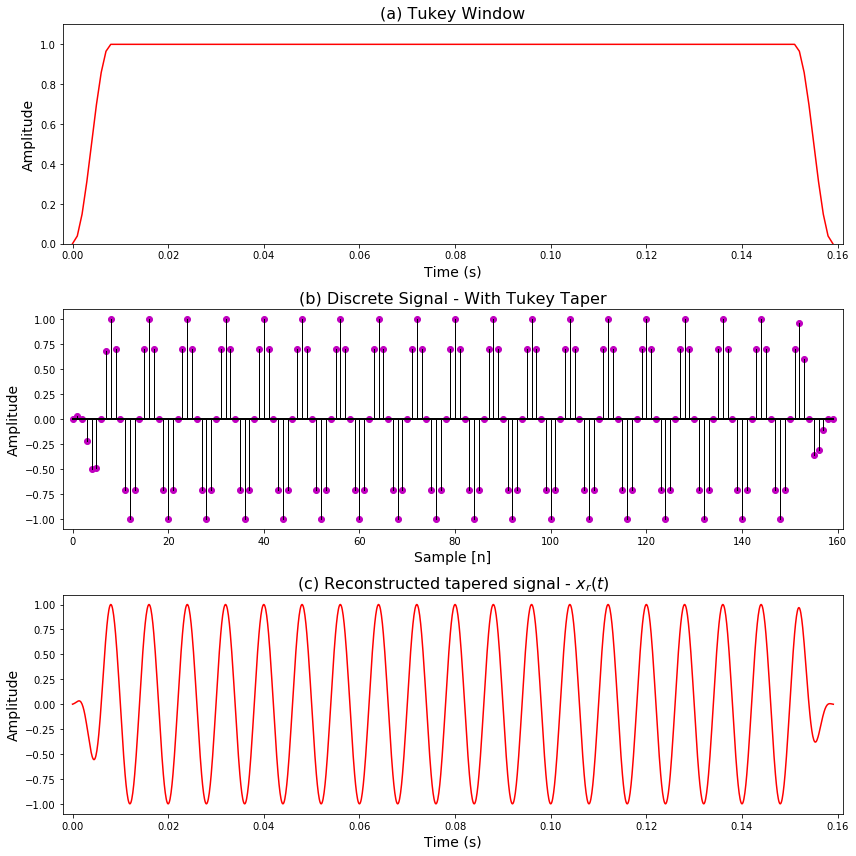

In [5]:
# . . Import the scipy signal processing tool box
from scipy import signal

# . . Close all plot windows
plt.close('all')
plt.figure(figsize=(12, 12))

# . . Make a Tukey window that can be used to treat end conditions
# . . See plot in 
window = signal.tukey(len(nn),alpha=0.1)

# . . Make a plot of the Tukey window (alpha=0.1)
plt.subplot(311)
plt.plot(nn,window,'r')
plt.axis([nmin-0.002,nmax+0.002,0,1.1])
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(a) Tukey Window',fontsize=16)

# . . Make the tapered discrete sampled signal
taperedsignal = window*np.cos(250*np.pi*nn) 

## . . Plot the discrete sampled signal with Multiplicative window applied
plt.subplot(312)
markerline, stemlines, baseline = plt.stem(nn*sfreq, taperedsignal,'-.')
plt.setp(baseline, 'color', 'k', 'linewidth', 2)
plt.setp(stemlines, 'color', 'k', 'linewidth', 1,'linestyle','-')
plt.setp(markerline, 'color', 'm')
plt.axis([nmin-2,nmax*sfreq+2,-1.1,1.1])
plt.xlabel('Sample [n]',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(b) Discrete Signal - With Tukey Taper',fontsize=16)

## . . Let's reconstruct the "continuous" from the discretely sampled
recontaperedsignal= 0.*np.cos(250*np.pi*tt)

for kk in range(0,len(nn)-1):
    recontaperedsignal += taperedsignal [kk]*np.sinc((tt-kk*T)/T) 

## . . Let's plot the interpolated result!
plt.subplot(313)
plt.plot(tt,recontaperedsignal,'r')
plt.axis([nmin-0.002,nmax+0.002,-1.1,1.1])
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(c) Reconstructed tapered signal - $x_r(t)$',fontsize=16)

# . . Plot the figure into the screen below
plt.tight_layout() # . . Make it so that the subplots don't overlap
plt.show()

**Figure 11. Recapitulation of the experiment shown in Figure 10, but this time applying tapers to the edges to minimize edge effects. (a) Tukey taper. (b) Discrete signal from Figure 10b after applying the Tukey taper in (a). (c) Resulting reconstructed signal.**

## Practical Fourier Sampling

One final comment regarding the use of the *np.fft.fft* and *np.fft.ifft* and Nyquist Sampling Theorem (NST).  If you have a $N$-point time series sampled at $\Delta t$, then the NST states that the **maximum absolute frequency** (i.e., the Nyquist frequency $f_N$) you can recover is 

$$f_N = \frac{1}{2\Delta t}. \tag{29}$$  

Thus, with respect to the maximum frequency because **it does not matter how many samples you actually have, by the NST you cannot recover any higher frequencies**.  

Note that if you have two versions of the same function with two different sampling rates (i.e., $\Delta t^{(1)}$ and $\Delta t^{(2)}$) and two different Nyquist frequencies ($f^{(1)}_{N}$ and $f^{(2)}_{N}$), then the following will hold:

$$\Delta t^{(1)} f^{(1)}_{N} = \Delta t^{(2)} f^{(2)}_{N}. \tag{30}$$

Note that the $N$ does matter because it dictates the **frequency resolution**, which is given by

$$\Delta \omega = \frac{2 f_{N}}{N}. \tag{31} $$

Note that two different representations of the same underlying signal can have the same $\Delta \omega$ but different $f_{max}$ (i.e., $f^{(1)}_{N}$ and $f^{(2)}_{N}$) if their total number of samples ($N_1$ and $N_2$) observe the following ratio:

$$\frac{f^{(1)}_{N}}{N^{(1)}} = \frac{f^{(2)}_{N}}{N^{(2)}}. \tag{32} $$
